<a href="https://colab.research.google.com/github/aspiringastro/practical_deep_learning/blob/main/big_cats_classifier_all_models_with_losses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai duckduckgo_search

     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 96 kB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
from google.colab import drive
_drive_path = '/content/gdrive'
drive.mount(_drive_path)
_project_path = f'{_drive_path}/My Drive/Colab/bigcats'
_model_path = f'{_project_path}/model'
_data_path = f'{_project_path}/data'
_train_path = f'{_data_path}/train'
_test_path = f'{_data_path}/test'

Mounted at /content/gdrive


In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

from fastai.vision.all import *

def search_images(term, max_images=30):
    return L(ddg_images(term, max_results=max_images)).itemgot('image')


In [7]:
searches = 'cheetah','jaguar','tiger','cougar','lion', 'african leopard', 'clouded leopard','snow leopard'
search_expression = 'animal', 'sun', 'shade', 'crouching', 'female', 'cub'
path = Path(_train_path)
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep

mb = master_bar(range(len(searches)))
for i in mb:
    o = searches[i]
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    for j in progress_bar(range(len(search_expression)), parent=mb):
      e = search_expression[j]
      s = f'{o} {e} photo'
      mb.child.comment = s
      download_images(dest, urls=search_images(s))
      sleep(1)  # Pause between searches to avoid over-loading server
    mb.main_bar.comment = o
    resize_images(path/o, max_size=400, dest=path/o)




In [10]:
test_expression = 'cub playing', 'female hunting', 'dawn running', 'dusk sleeping', 'hidden'
test_path = Path(_test_path)

mb = master_bar(range(len(searches)))
for i in mb:
    o = searches[i]
    dest = (test_path/o)
    dest.mkdir(exist_ok=True, parents=True)
    for j in progress_bar(range(len(test_expression)), parent=mb):
      e = test_expression[j]
      s = f'{o} {e} photo'
      mb.child.comment = s
      download_images(dest, urls=search_images(s, max_images=3))
      sleep(1)  # Pause between searches to avoid over-loading server
    mb.main_bar.comment = o
    resize_images(path/o, max_size=400, dest=path/o)


In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f'Failed train images: {len(failed)}')


failed = verify_images(get_image_files(test_path))
failed.map(Path.unlink)
print(f'Failed test images: {len(failed)}')




Failed train images: 38
Failed test images: 1


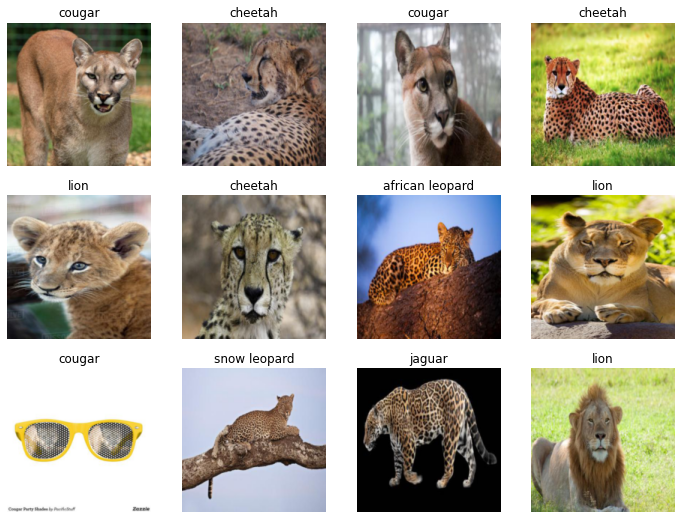

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [ ]:
# TODO: Clean the dataset after doing one-pass of prediction and plotting top losses

In [13]:
vision_models = { "resnet18" : resnet18, "resnet34" : resnet34, "resnet50": resnet50, "resnet101": resnet101, "resnet152": resnet152} 
learners = {}
model_path = Path(_model_path)
model_path.mkdir(exist_ok=True, parents=True)
for name, model in vision_models.items():
  learners[name] = vision_learner(dls, model, metrics=error_rate)
  learners[name].fine_tune(5)

  learners[name].export(fname=f'{_model_path}/{name}-model.pkl')
  


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.364399,0.456290,0.120163,04:37


epoch,train_loss,valid_loss,error_rate,time
0,0.537082,0.388985,0.103870,06:44
1,0.374311,0.397693,0.095723,06:40
2,0.228214,0.393210,0.085540,06:43
3,0.146602,0.371787,0.087576,06:38
4,0.085070,0.365864,0.083503,06:29


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.380529,0.385983,0.097760,08:17


epoch,train_loss,valid_loss,error_rate,time
0,0.474898,0.350150,0.077393,12:03
1,0.350079,0.423922,0.093686,12:04
2,0.244431,0.372633,0.069246,12:13
3,0.142567,0.358478,0.063136,12:15
4,0.085423,0.354193,0.061100,12:06


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.040842,0.384534,0.097760,12:42


epoch,train_loss,valid_loss,error_rate,time
0,0.372247,0.387169,0.075356,17:14
1,0.332082,0.395395,0.099796,17:35
2,0.246598,0.339718,0.067210,17:32
3,0.136729,0.288591,0.054990,17:22
4,0.080418,0.285146,0.057026,17:40


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.924971,0.518113,0.118126,21:52


epoch,train_loss,valid_loss,error_rate,time
0,0.448286,0.396178,0.079430,30:59
1,0.377486,0.610790,0.132383,30:16
2,0.269237,0.330421,0.071283,29:51
3,0.154464,0.297133,0.059063,29:47
4,0.082931,0.292326,0.054990,29:38


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.953463,0.414413,0.085540,31:45


epoch,train_loss,valid_loss,error_rate,time
0,0.408244,0.515656,0.107943,43:13
1,0.342098,0.391189,0.071283,43:10
2,0.246223,0.340031,0.059063,44:13
3,0.150230,0.276139,0.059063,45:47
4,0.091387,0.284693,0.063136,45:33


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

images = []
labels = []
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(4, len(searches)//4, figsize=(10,10))
    axes = axes.flatten()
    for img, title, ax in zip( images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

for k, model in vision_models.items():
  print(f'***************** {k} *****************')
  success = 0
  total = 0
  for cat in get_image_files(test_path):
      img = PILImage.create(cat)
      what_cat, _, probs = learners[k].predict(img)
      labels.append(f'{k}: P: {what_cat}/A: {Path(cat).parent.name} Conf: {probs[learners[k].dls.vocab.o2i[what_cat]]:.4f}')
      if Path(cat).parent.name == what_cat: 
        success += 1
      total += 1
      images.append(img)
  print(f'Model: {k} Success: {success} Total: {total}, Accuracy: {success/total:.4f}')
  plotImages(images, labels)


  
  


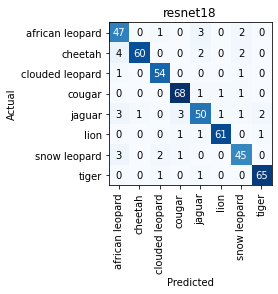

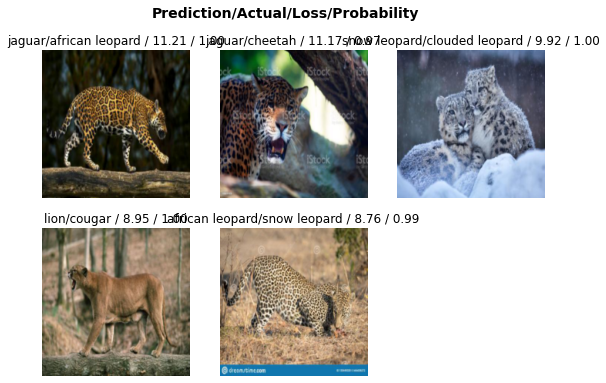

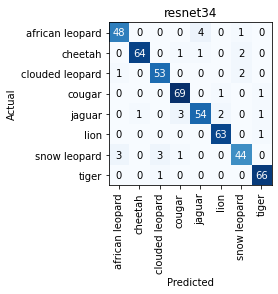

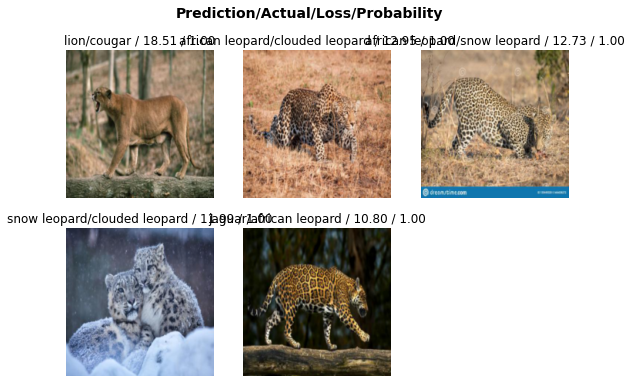

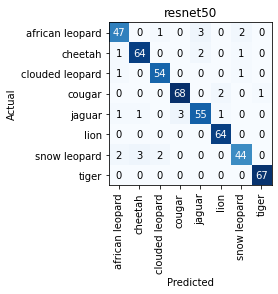

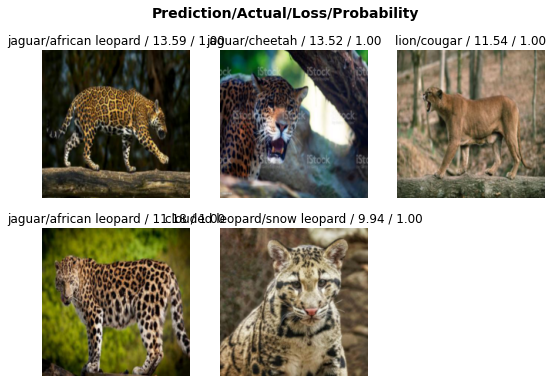

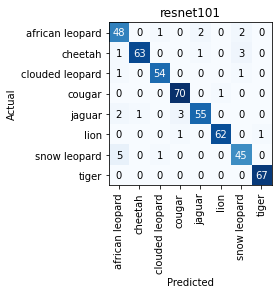

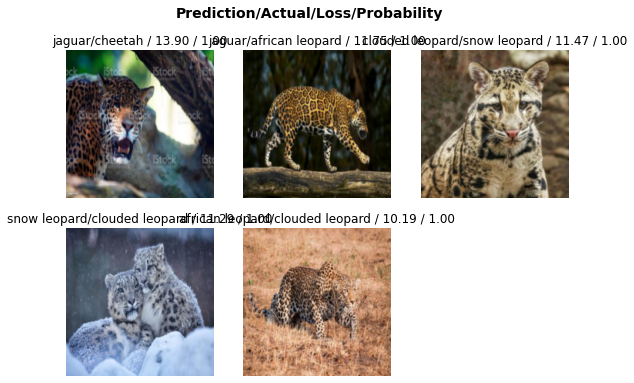

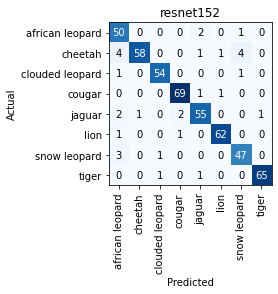

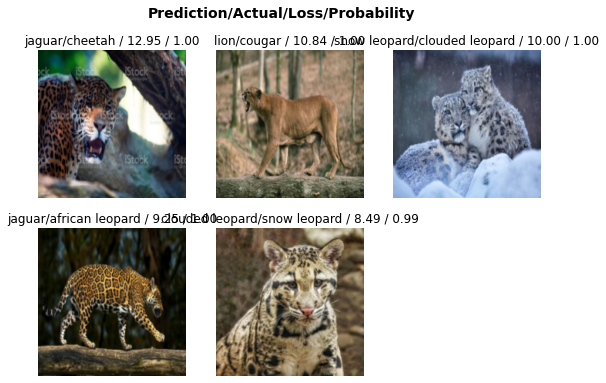

In [15]:
for k, model in vision_models.items():
  # Interpretation
  interp = ClassificationInterpretation.from_learner(learners[k])
  interp.plot_confusion_matrix(title=k)
  interp.plot_top_losses(k=5)